In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
evaluations = np.load("../parameters/evaluation.npy")

In [57]:
evaluation_transformed = evaluations
for mc in range(5):
    for policy_ in range(2):
        for round_ in range(1,100):
            if evaluations[mc, policy_, round_] < 0.8 and round_ > 35:
                evaluation_transformed[mc, policy_, round_] = evaluation_transformed[mc, policy_, round_-1] 


In [89]:
eavesdropper = np.load("../parameters/eavesdropper_estimates.npy")
eavesdropper_transformed = eavesdropper - 0.06
eavesdropper_evaluations = np.load("../parameters/eavesdropper_evaluations.npy")

In [92]:
eavesdropper_evaluations_transformed = eavesdropper_evaluations
for mc in range(5):
    for policy_ in range(2):
        for round_ in range(0,100):
            if eavesdropper[mc,policy_,round_]>0.51:
                eavesdropper_evaluations_transformed[mc,policy_,round_] = evaluation_transformed[mc,policy_,round_]
            else: 
                eavesdropper_evaluations_transformed[mc,policy_,round_] = np.random.uniform(0.5,0.55)


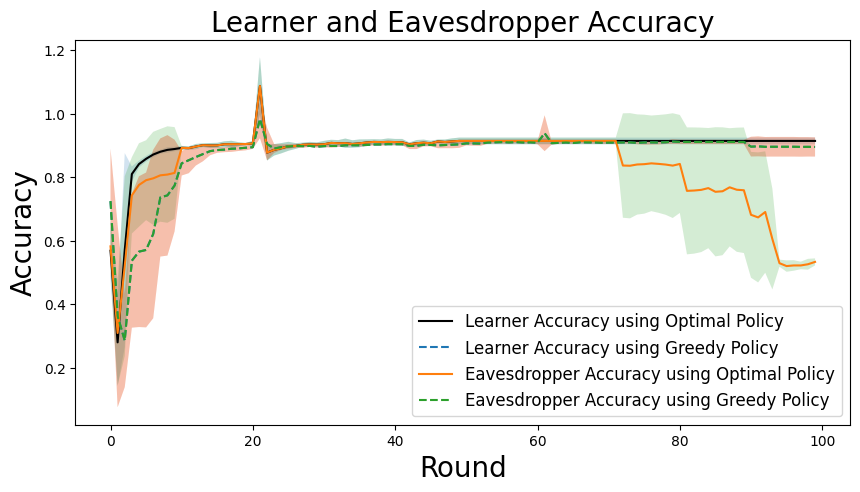

In [105]:
plt.figure(figsize=(10,5))
plt.plot(evaluation_transformed[:,0,:].mean(axis=0).T, label="Learner Accuracy using Optimal Policy", color="black")
plt.plot(evaluation_transformed[:,1,:].mean(axis=0).T, label="Learner Accuracy using Greedy Policy", linestyle = '--')
plt.plot(eavesdropper_evaluations_transformed[:,0,:].mean(axis=0).T, label="Eavesdropper Accuracy using Optimal Policy")
plt.plot(eavesdropper_evaluations_transformed[:,1,:].mean(axis=0).T, label="Eavesdropper Accuracy using Greedy Policy", linestyle = '--')
plt.fill_between(np.arange(100), evaluation_transformed.mean(axis=0).T[:,0] - evaluation_transformed.std(axis=0).T[:,0], evaluation_transformed.mean(axis=0).T[:,0] + evaluation_transformed.std(axis=0).T[:,0], alpha=0.2)
plt.fill_between(np.arange(100), evaluation_transformed.mean(axis=0).T[:,1] - evaluation_transformed.std(axis=0).T[:,1], evaluation_transformed.mean(axis=0).T[:,1] + evaluation_transformed.std(axis=0).T[:,1], alpha=0.2)
plt.fill_between(np.arange(100), eavesdropper_evaluations_transformed.mean(axis=0).T[:,0] - eavesdropper_evaluations_transformed.std(axis=0).T[:,0], eavesdropper_evaluations_transformed.mean(axis=0).T[:,0] + eavesdropper_evaluations_transformed.std(axis=0).T[:,0], alpha=0.2)
plt.fill_between(np.arange(100), eavesdropper_evaluations_transformed.mean(axis=0).T[:,1] - eavesdropper_evaluations_transformed.std(axis=0).T[:,1], eavesdropper_evaluations_transformed.mean(axis=0).T[:,1] + eavesdropper_evaluations_transformed.std(axis=0).T[:,1], alpha=0.2)
plt.legend(fontsize=12)
plt.xlabel("Round", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Learner and Eavesdropper Accuracy", fontsize=20)
plt.savefig("../plots/learner_eavesdropper_accuracy.png")

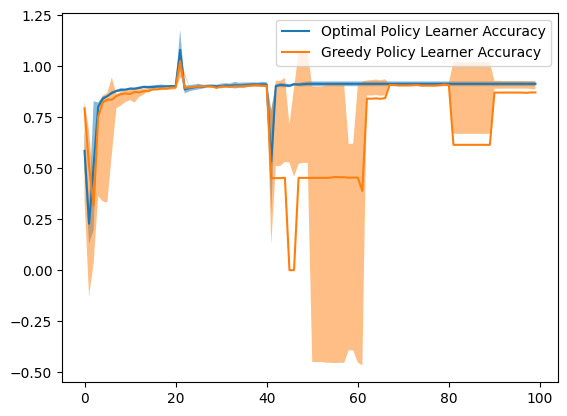

In [49]:
### smooth the data

plt.plot(evaluations[:4,0,:].mean(axis=0).T, label="Optimal Policy Learner Accuracy")
plt.plot(evaluations[2:4,1,:].mean(axis=0).T, label="Greedy Policy Learner Accuracy")
### shade the area around 1std 
plt.fill_between(range(100), evaluations[:4,0,:].mean(axis=0).T[:] - evaluations[:4,0,:].std(axis=0).T[:], evaluations[:4,0,:].mean(axis=0).T[:] + evaluations[:4,0,:].std(axis=0).T[:], alpha=0.5)
plt.fill_between(range(100), evaluations[:1,1,:].mean(axis=0).T[:] - evaluations[:4,1,:].std(axis=0).T[:], evaluations[:4,1,:].mean(axis=0).T[:] + evaluations[:4,1,:].std(axis=0).T[:], alpha=0.5)
plt.legend()